In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Flowline for the project
1. Figuring out the tasks to perform, ask questions
2. Data cleaning and processing
3. Data visualization and analysis
5. Model the data for prediction
*All the comments, analysis, and feedback can be put in the markdown*

# 1. Ask questions... What are we trying to find

* We have to predict heart failure with the given conditions
* Baised or unbaised data
* Understanding the data given and the situation
* See how each factor is corelated to each other
* Also see how each factor contributes to heart disease (and which are the important ones)
* Which model can be best used for prediction


# 2. Data cleaning and pre-processing

Need to download the file and run it in here.

In [ ]:
#data=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
data=pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.isnull().sum(axis=0)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* *min. BP, cholestrol, etc. zero?? check the particular data*
* #######row 449 has zero values#########

In [ ]:
data[data['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
# deleting the RestingBP=0 row
data = data.drop(labels=449, axis=0)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data['HeartDisease'].value_counts()

1    507
0    410
Name: HeartDisease, dtype: int64

In [ ]:
data['ChestPainType'].value_counts()

ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
data['Sex'].value_counts()

M    724
F    193
Name: Sex, dtype: int64

*the sample set is not representative?*

In [ ]:
data.groupby('HeartDisease').describe()

Age                                   ... Oldpeak                    
              count       mean       std   min   25%  ...     min  25%  50%  75%  max
HeartDisease                                          ...                            
0             410.0  50.551220  9.444915  28.0  43.0  ...    -1.1  0.0  0.0  0.6  4.2
1             507.0  55.901381  8.735583  31.0  51.0  ...    -2.6  0.0  1.2  2.0  6.2

[2 rows x 48 columns]

In [ ]:
data['RestingECG'].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
data['ST_Slope'].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
data['ExerciseAngina'].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Checking for outliers**

In [ ]:
cols = [i for i in data.columns if i!='HeartDisease' and data[i].dtypes!='O' and i!='FastingBS']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


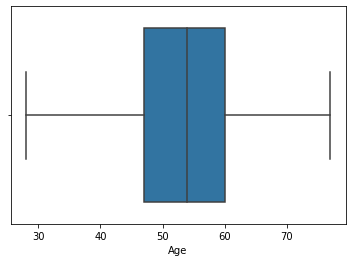

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


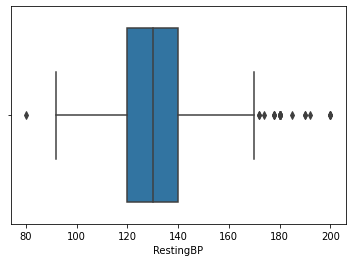

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


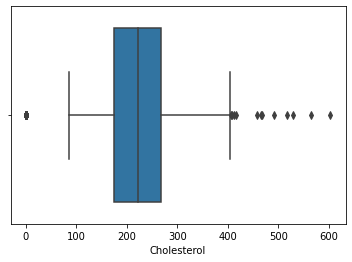

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


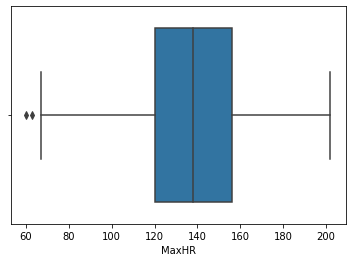

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


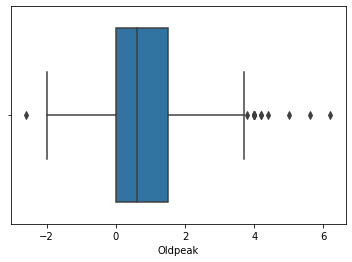

In [ ]:
for i in cols:
    sns.boxplot(data[i]);
    plt.show();

# **Treating outliers by using quantiles**

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [ ]:
data1=data[~((data[cols]<lower) | (data[cols]>upper)).any(axis=1)]

In [ ]:
print(data.shape, data1.shape)

(917, 12) (702, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


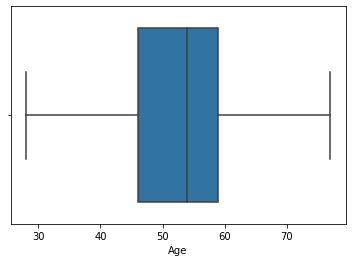

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


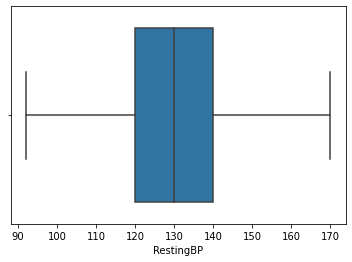

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


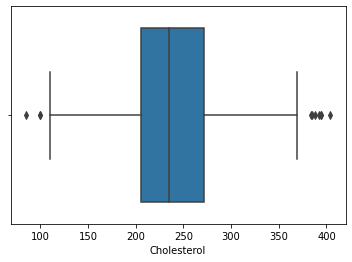

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


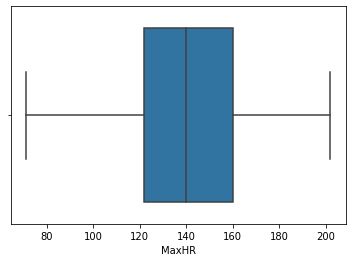

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


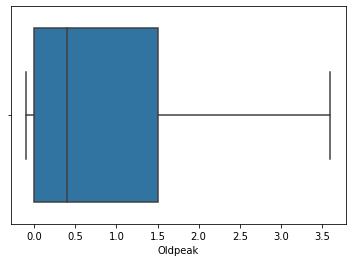

In [ ]:
for i in cols:
    #sns.boxplot(data[i])
    sns.boxplot(data1[i])
    plt.show();

# Data visualization and analysis

In [ ]:
# Reference: https://www.kaggle.com/miteshsoni/heartdiseaseprediction-eda-in-depth-explained/notebook

In [ ]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
HD=data1[data1['HeartDisease']==1]

In [ ]:
HD.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


# Gender

<function matplotlib.pyplot.show>

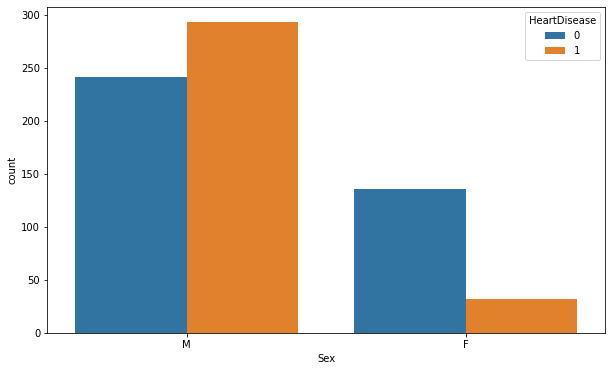

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=data1.Sex, hue=data1.HeartDisease)
plt.show

*Though the sample is not representative, if we compare the ratios, we see males are more prone to heart disease when compared to females*

<function matplotlib.pyplot.show>

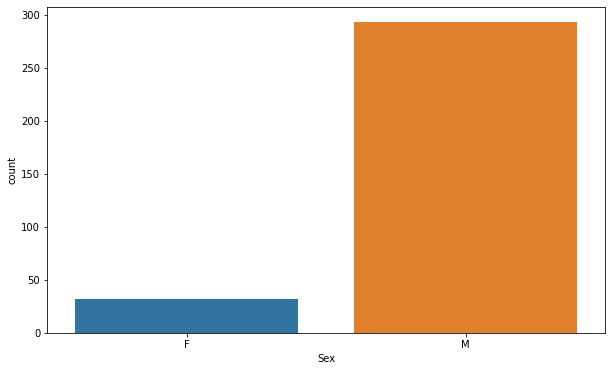

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=HD.Sex)
plt.show

comfirmation of males more likely to have heart diseases than females

# Age

<function matplotlib.pyplot.show>

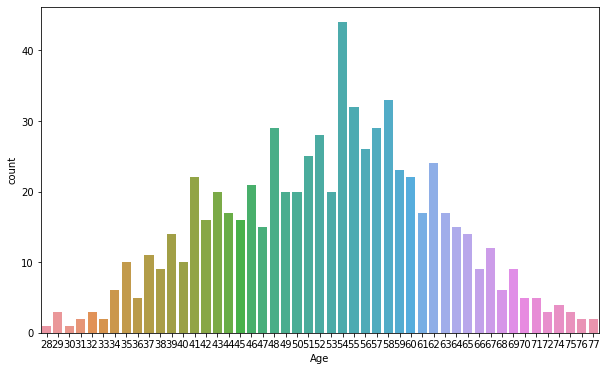

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=data1.Age)
plt.show

Age 48-62 is the most dense age range in the dataset, with age 54 being the most counted

<function matplotlib.pyplot.show>

<Figure size 1440x864 with 0 Axes>

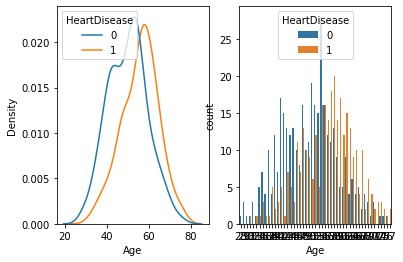

In [ ]:
plt.figure(figsize=(20,12))
f, axes = plt.subplots(1, 2)
#plt.figure(figsize=(20,12))
sns.kdeplot(x=data1.Age, hue=data1.HeartDisease, ax=axes[0])
sns.countplot(x=data1.Age, hue=data1.HeartDisease, ax=axes[1])
plt.show

<function matplotlib.pyplot.show>

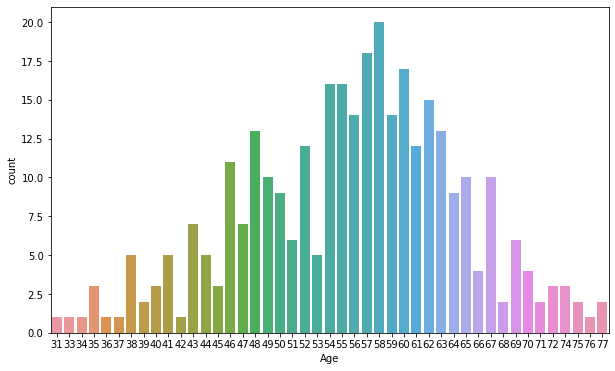

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=HD.Age)
plt.show

1. The number of heart diseases is not proportional to increasing age, rather it seems we have a age group of 46-67 years where the number of heart diseases are a lot
2. People of age 58 are the most affected

<function matplotlib.pyplot.show>

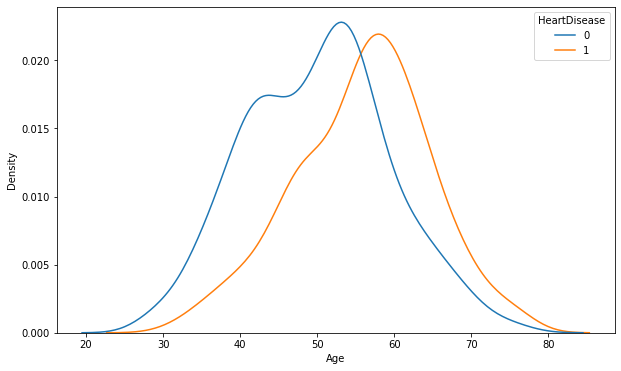

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=data1.Age, hue=data1.HeartDisease)
plt.show

# Chest Pain Type

In [ ]:
data1.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<function matplotlib.pyplot.show>

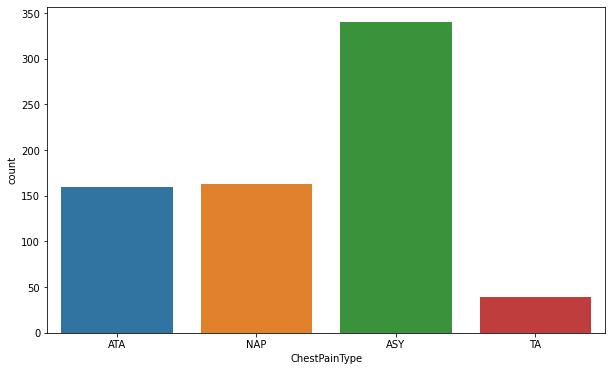

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=data1.ChestPainType)
plt.show

<function matplotlib.pyplot.show>

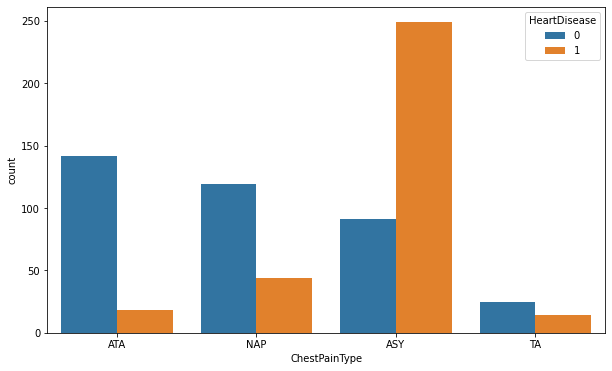

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=data1.ChestPainType, hue=data1.HeartDisease)
plt.show

In general also, and in the cases of heart diseases, ASY is the biggest contributer to chest pains

In [ ]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Resting BP

<function matplotlib.pyplot.show>

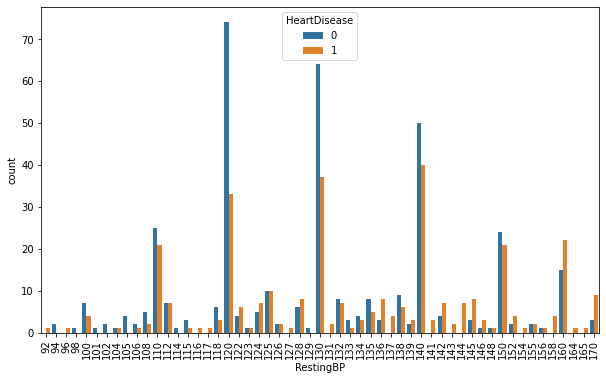

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.RestingBP, hue=data1.HeartDisease)
plt.show

<function matplotlib.pyplot.show>

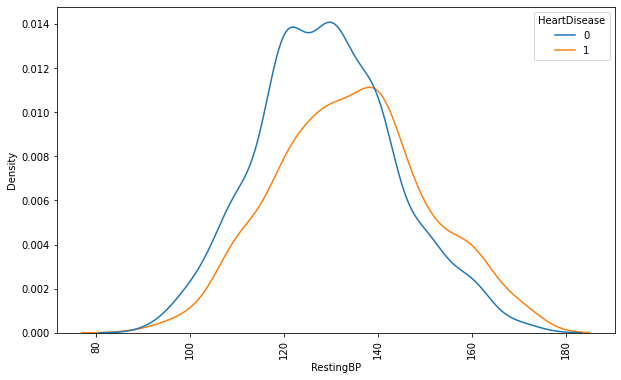

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.kdeplot(x=data1.RestingBP, hue=data1.HeartDisease)
plt.show

There doesn't seem to be any specific relation betwwen Resting BP and heart diseases. Just that some of the values of Resting BP are more occuring in both cases

<function matplotlib.pyplot.show>

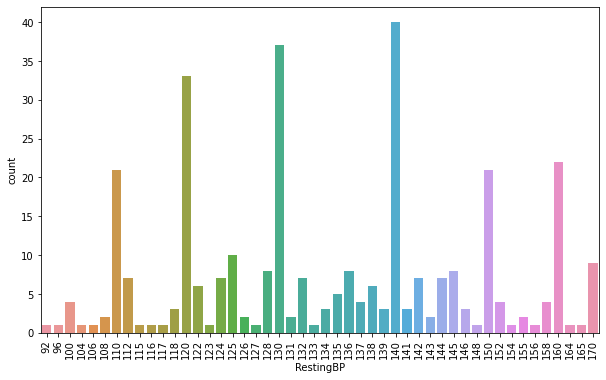

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=HD.RestingBP)
plt.show

Resting BP doesn't seem to be directly related to heart dieases, 
though there may be some hidden features which needs to be explored :)

# Cholesterol

<function matplotlib.pyplot.show>

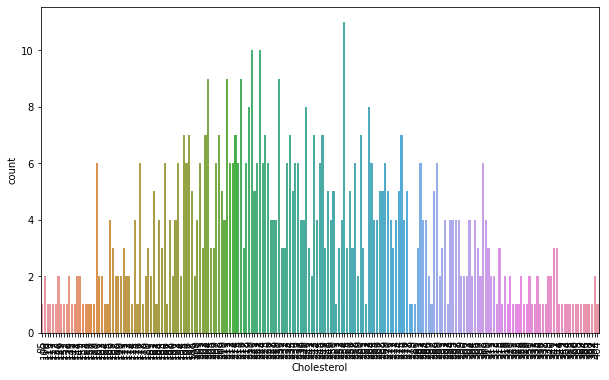

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.Cholesterol)
plt.show

<function matplotlib.pyplot.show>

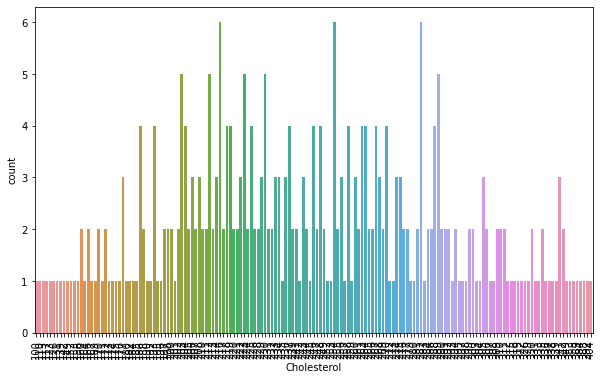

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=HD.Cholesterol)
plt.show

<function matplotlib.pyplot.show>

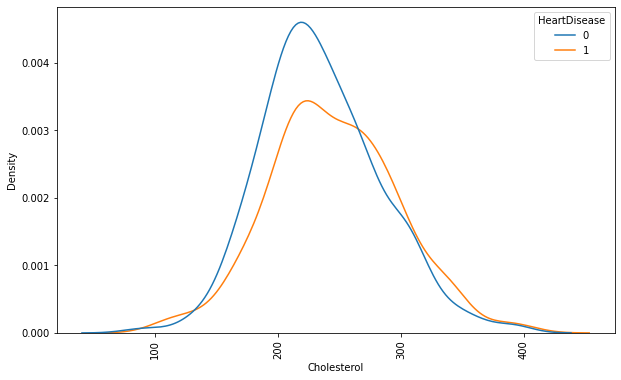

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.kdeplot(x=data1.Cholesterol, hue=data1.HeartDisease)
plt.show

<Figure size 720x432 with 0 Axes>

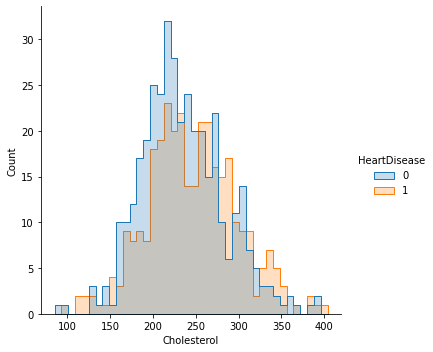

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data1, x="Cholesterol", hue='HeartDisease', element="step", bins=40)
plt.show()

Cholesterol also doesn't seem to be a lot different in cases of heart disease and not heart disease. People with heart disease have slightly more cholesterol levels, and the peak population is spread on a wider range

# Fasting BS

<function matplotlib.pyplot.show>

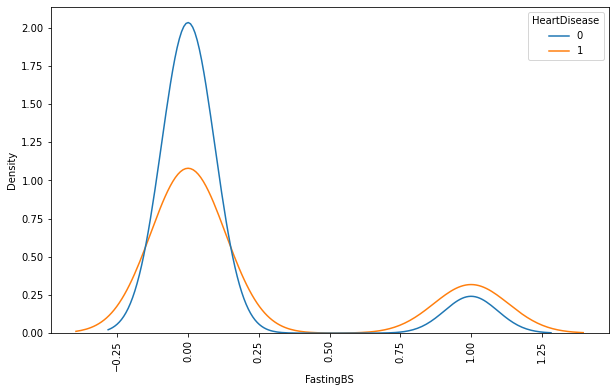

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.kdeplot(x=data1.FastingBS, hue=data1.HeartDisease)
plt.show

<function matplotlib.pyplot.show>

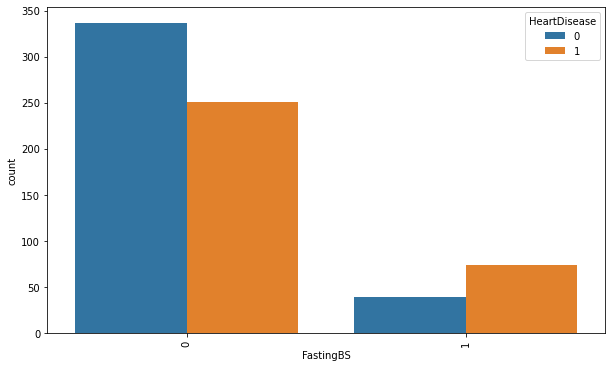

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.FastingBS, hue=data1.HeartDisease)
plt.show

In [ ]:
data1['FastingBS'].value_counts()

0    588
1    114
Name: FastingBS, dtype: int64

In [ ]:
table = pd.pivot_table(data1, index =['FastingBS'], aggfunc=np.sum)
  
table

,Age,Cholesterol,HeartDisease,MaxHR,Oldpeak,RestingBP
FastingBS,,,,,,
0,30413,140570,251,83352,471.7,76661
1,6598,27706,74,15314,111.6,15692


Not sure of how can we incorperate Fasting BS into the modelling because it is a binary value with no directly visible tread

# RestingECG

<function matplotlib.pyplot.show>

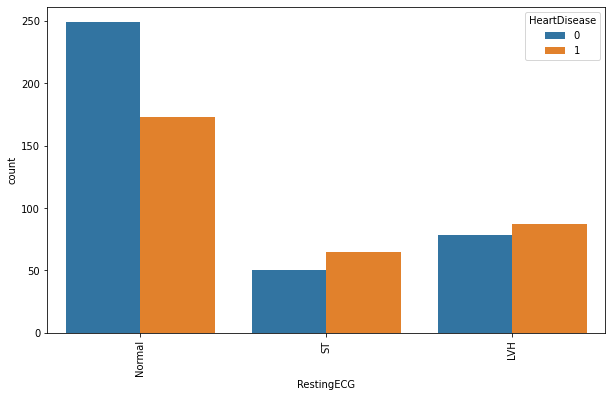

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.RestingECG, hue=data1.HeartDisease)
plt.show

Resting ECG generally remains in normal condition. Considering the case of people heart disease, the number of people with normal resting ECG is lesser, and there is an increase in ST and LVH cases. There may be a direct correlation between increase ST and LVH cases, and increase in heart disease

# Max HR

<function matplotlib.pyplot.show>

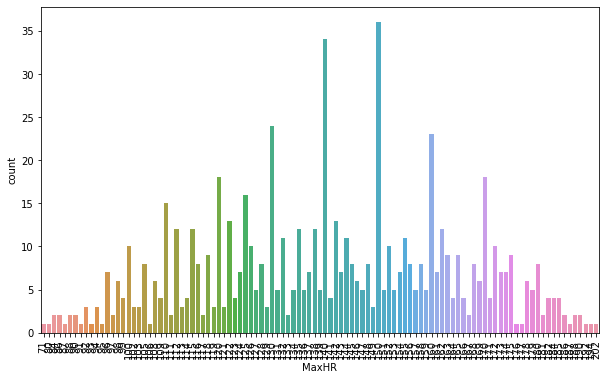

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.MaxHR)
plt.show

<function matplotlib.pyplot.show>

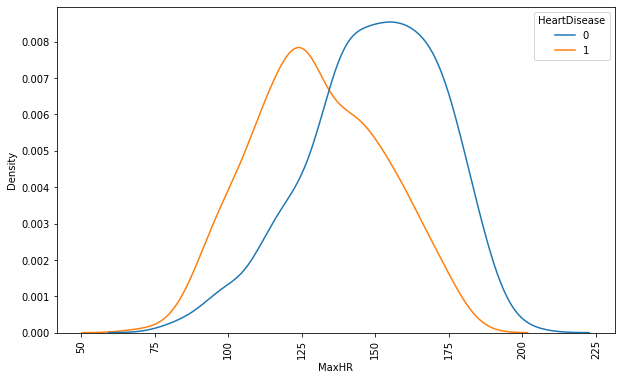

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.kdeplot(x=data1.MaxHR, hue=data1.HeartDisease)
plt.show

<Figure size 720x432 with 0 Axes>

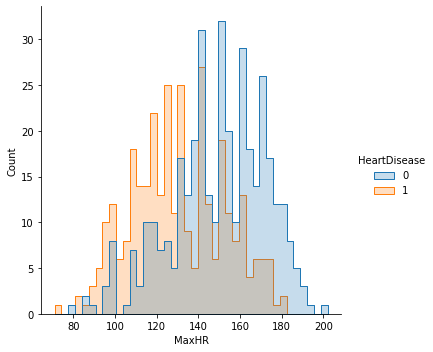

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data1, x="MaxHR", hue='HeartDisease', element="step", bins=40)
plt.show()

The skewness can be seen here. The Max HR for people with heart disease is left skewed compared to Max HR for people without heart disease

# ExerciseAngina

<function matplotlib.pyplot.show>

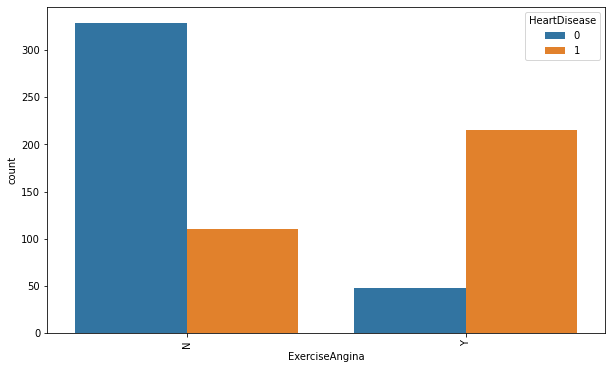

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.ExerciseAngina, hue=data1.HeartDisease)
plt.show

Having Angina during exercise is directly correlated with heart disease

# Oldpeak

<function matplotlib.pyplot.show>

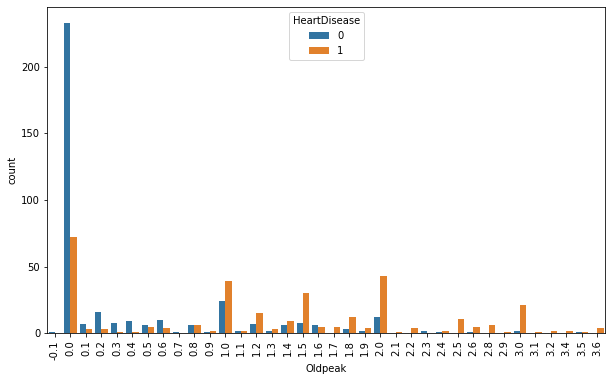

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.Oldpeak, hue=data1.HeartDisease)
plt.show

<function matplotlib.pyplot.show>

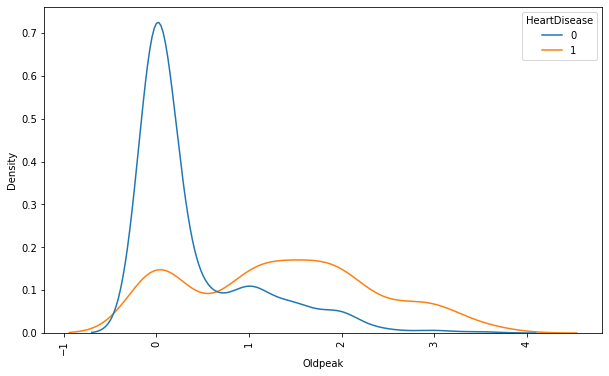

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.kdeplot(x=data1.Oldpeak, hue=data1.HeartDisease)
plt.show

# ST_Slope

<function matplotlib.pyplot.show>

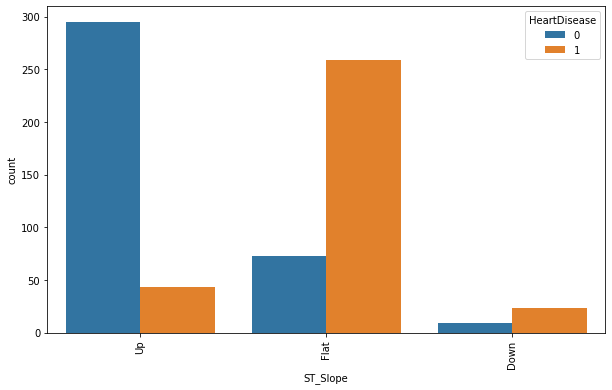

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data1.ST_Slope, hue=data1.HeartDisease)
plt.show

Generally, it can be concluded that in the normal case, people with no heart disease have and Up ST slope, while people with heart disease have a flat ST slope

# Correlation

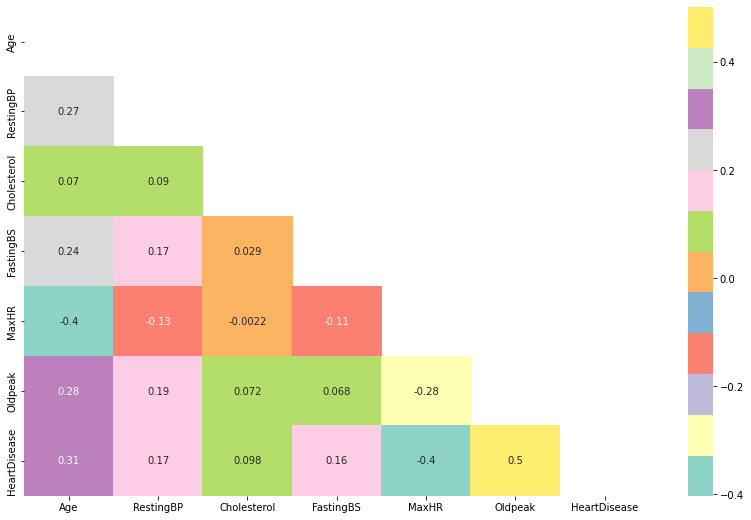

In [ ]:
cor=data1.corr()
plt.figure(figsize=(14,9))
matrix = np.triu(cor)
sns.heatmap(cor, annot=True, mask=matrix, cmap="Set3");

almost no correlation among them

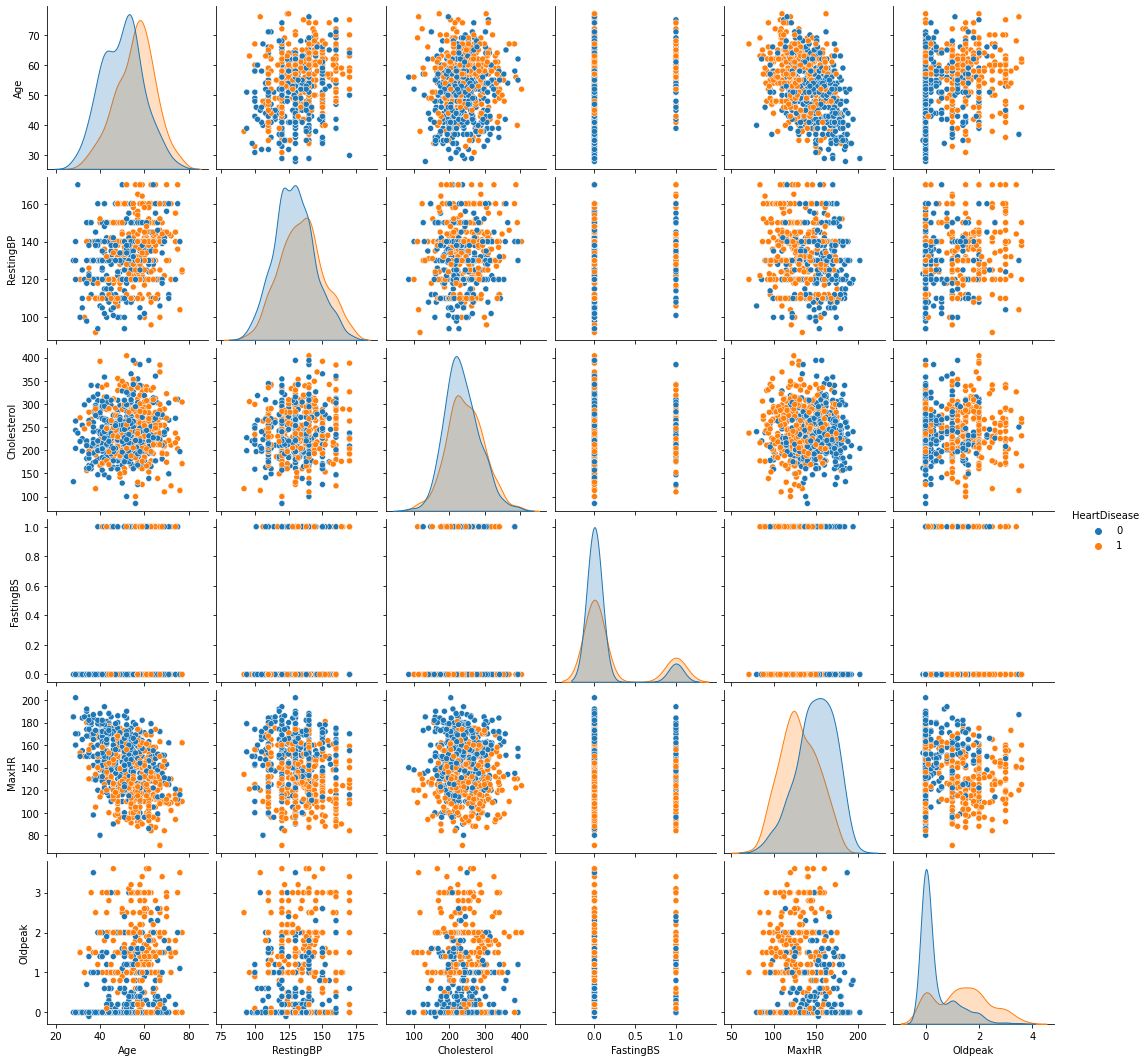

In [ ]:
#sns.set_theme(style="ticks")

sns.load_dataset("tips")
sns.pairplot(data1, hue="HeartDisease")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20d5fe6a50>,
      dtype=object)

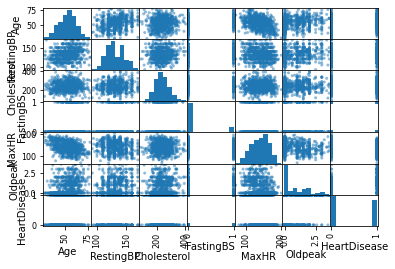

In [ ]:
pd.plotting.scatter_matrix(data1, alpha=0.5)

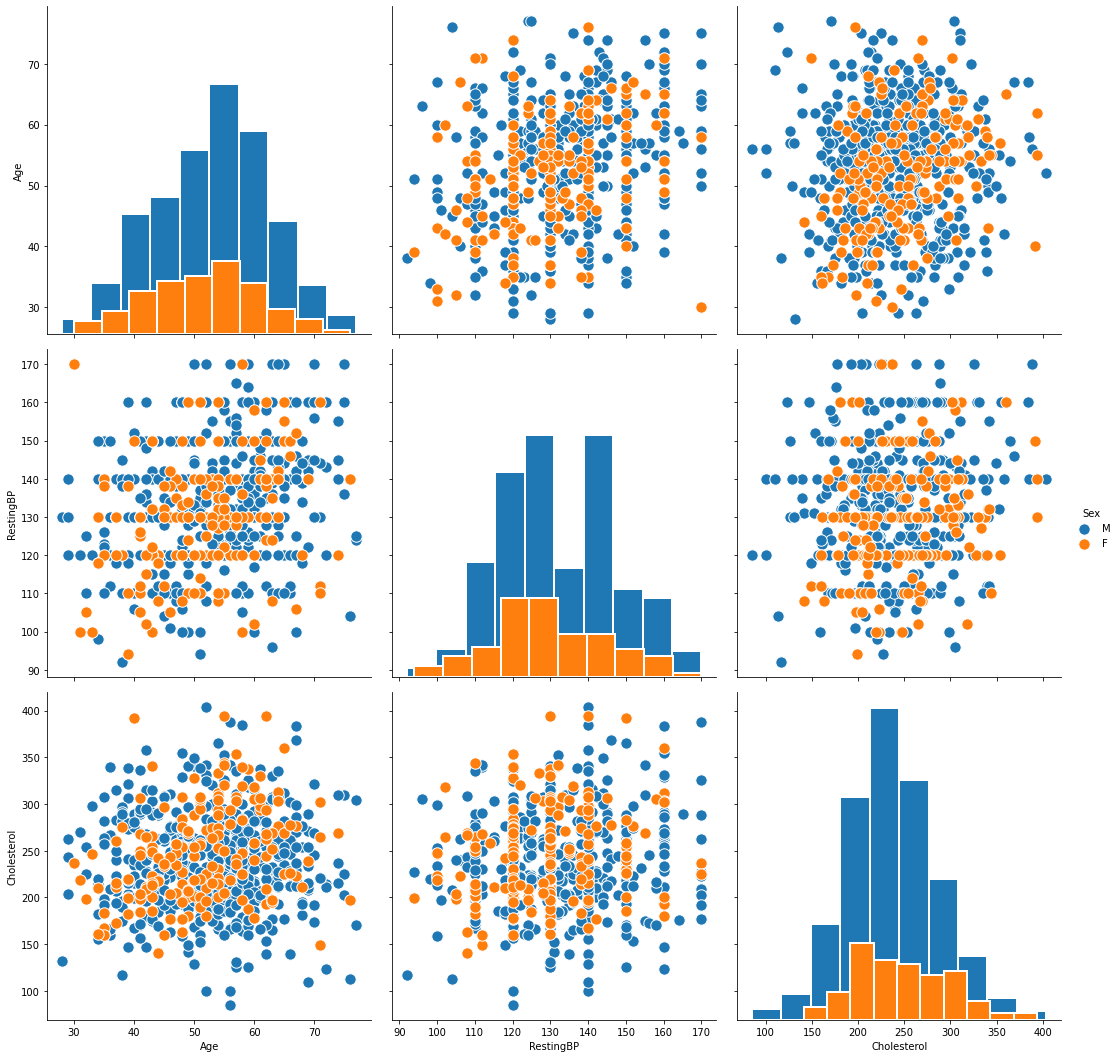

In [ ]:

# https://www.kaggle.com/gaganmaahi224/eda-detailed-explanation-of-knn-algorithm
# Plot a subset of variables
g = sns.PairGrid(data1 , hue='Sex' ,vars=["Age","RestingBP","Cholesterol"],height=5, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

# Feature engineering

In [ ]:
from sklearn import preprocessing 
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# mi score # feature engineering
# https://www.kaggle.com/gaganmaahi224/eda-detailed-explanation-of-knn-algorithm
data2=data1

In [ ]:
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
def LABEL_ENCODING(c):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data2[c]= label_encoder.fit_transform(data2[c])
    data2[c].unique()

In [ ]:
LABEL_ENCODING("Sex")
LABEL_ENCODING("ChestPainType")
LABEL_ENCODING("RestingECG")
LABEL_ENCODING("ExerciseAngina")
LABEL_ENCODING("ST_Slope")
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(data2.drop('HeartDisease',axis = 1))
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
scaled_features = scaler.transform(data2.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = data2.columns[:-1])
df_feat.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.335169,0.560898,0.147121,0.547914,0.973199,-0.440315,0.113502,1.291925,-0.774008,-0.866393,0.971639
1,-0.390639,-1.782855,1.190340,1.845825,-1.178909,-0.440315,0.113502,0.634669,-0.774008,0.176309,-0.750812
2,-1.650013,0.560898,0.147121,-0.101041,0.854735,-0.440315,1.707064,-1.747885,-0.774008,-0.866393,0.971639
3,-0.495587,-1.782855,-0.896099,0.418123,-0.507609,-0.440315,0.113502,-1.337100,1.291976,0.697660,-0.750812
4,0.134100,0.560898,1.190340,1.196870,-0.882748,-0.440315,0.113502,-0.762001,-0.774008,-0.866393,0.971639


In [ ]:
df_feat.Age.describe()

count    7.020000e+02
mean     1.764970e-16
std      1.000713e+00
min     -2.594543e+00
25%     -7.054824e-01
50%      1.341000e-01
75%      6.588389e-01
max      2.547899e+00
Name: Age, dtype: float64

In [ ]:
X = df_feat
y = data1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

KNN algorithm

In [ ]:
knn_algo=KNeighborsClassifier(n_neighbors=10)
knn_algo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
prediction=knn_algo.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test,prediction))

[[95 14]
 [23 79]]


good enough prediction with the KNN algorithm

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.85      0.77      0.81       102

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211



Let's see how the accuracy varies with the number of nearest neighbors

In [ ]:
mean_error=[]
for i in range(1, 40):
  KNN=KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train, y_train)
  prediction=KNN.predict(X_test)
  mean_error.append(np.mean(prediction != y_test))

Text(0, 0.5, 'Mean error')

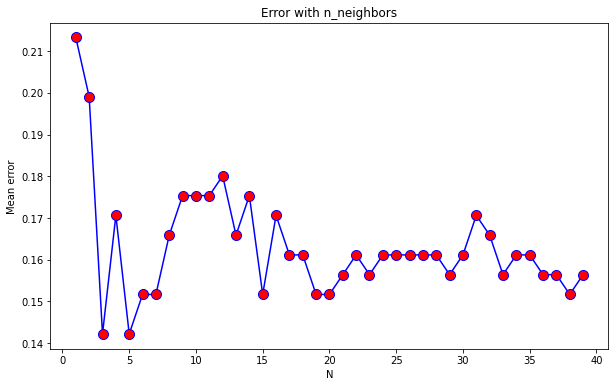

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 40), mean_error, color = 'blue', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error with n_neighbors')
plt.xlabel('N')
plt.ylabel('Mean error')

K values in the range 23-28 seem to give minimum error

In [ ]:
acc_KNN=metrics.accuracy_score(y_test, prediction)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8436018957345972


Random forest classifier

In [ ]:
RF=RandomForestClassifier(n_estimators=50, random_state=0)
RF.fit(X_train, y_train)
y_pred=RF.predict(X_test)

In [ ]:
print("confusion_matrix:", "\n", confusion_matrix(y_test,y_pred))
print('\n')
print("classification_report:", "\n", classification_report(y_test,y_pred))

confusion_matrix: 
 [[91 18]
 [14 88]]


classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.83      0.86      0.85       102

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



In [ ]:
acc_RF=RF.score(X_test,y_test)
print("Accuracy:",RF.score(X_test,y_test))

Accuracy: 0.8483412322274881


Accuracy is very close to KNN algorithm but little more

Logistic Regressor Classifier

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
pred_LR = LR.predict(X_test)
acc_LR=accuracy_score(y_test, pred_LR)

In [ ]:
print("confusion_matrix:", "\n", confusion_matrix(y_test,pred_LR))
print('\n')
print("classification_report:", "\n", classification_report(y_test,pred_LR))

confusion_matrix: 
 [[89 20]
 [13 89]]


classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.82      0.87      0.84       102

    accuracy                           0.84       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.85      0.84      0.84       211



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

In [ ]:
#Decision Tree Classifier
DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)
DT.fit(X_train, y_train)
pred_DT = DT.predict(X_test)
acc_DT=accuracy_score(y_test, pred_DT)

# https://www.kaggle.com/arezoodahesh/heart-failure-prediction-with-ensemble-models

In [ ]:
# MLP Classifier
MLP = MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.1, random_state=0,
              solver='sgd')
MLP.fit(X_train, y_train)

pred_MLP = MLP.predict(X_test)
acc_MLP = accuracy_score(y_test, pred_MLP)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#Support Vector Classifier
SVM = SVC(C=10, gamma=0.5, kernel='poly', random_state=0, probability=True)
SVM.fit(X_train, y_train)
pred_SVM = SVM.predict(X_test)
acc_SVM = accuracy_score(y_test, pred_SVM)

In [ ]:
#Extra Trees Classifier
ET = ExtraTreesClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                     n_estimators=200, random_state=0)
ET.fit(X_train, y_train)
pred_ET = ET.predict(X_test)
acc_ET = accuracy_score(y_test, pred_ET)

In [ ]:
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(criterion='mse', loss='exponential',
                           min_samples_leaf=4, min_samples_split=6,
                           n_estimators=25, random_state=0)
GB.fit(X_train, y_train)

pred_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

In [ ]:
#Stacking Classifier
estimators = [('DT', DT),
              ('RF', RF),
              ('SVM', SVM),
              ('MLP', MLP),
              ('ET', ET),
              ('LR', LR),
              ('KNN', KNN),
              ('GB', GB),
             ]

SC_tune_LR = StackingClassifier(estimators = estimators, final_estimator = LR)
SC_tune_LR.fit(X_train, y_train)
pred_SC_tune_LR = SC_tune_LR.predict(X_test)
acc_SC_tune_LR = accuracy_score(y_test, pred_SC_tune_LR)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarnin

In [ ]:
# Accuracy of all the models
print("DT: ", acc_DT)
print("RF: ", acc_RF)
print("MLP: ", acc_MLP)
print("ET: ", acc_ET)
print("LR: ", acc_LR)
print("KNN: ", acc_KNN)
print("GB: ", acc_GB)
print("SC: ", acc_SC_tune_LR)

DT:  0.8151658767772512
RF:  0.8483412322274881
MLP:  0.8341232227488151
ET:  0.8767772511848341
LR:  0.8436018957345972
KNN:  0.8436018957345972
GB:  0.8672985781990521
SC:  0.8672985781990521


Best model is Extra Trees (ET) model with accuracy score of 0.8767772511848341

In [ ]:
feature = pd.Series(RF.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

ST_Slope          0.231758
Oldpeak           0.123867
ChestPainType     0.109292
MaxHR             0.108739
ExerciseAngina    0.106156
Age               0.079907
Cholesterol       0.077117
RestingBP         0.075856
RestingECG        0.035799
Sex               0.035753
FastingBS         0.015757
dtype: float64


Text(0, 0.5, 'Features')

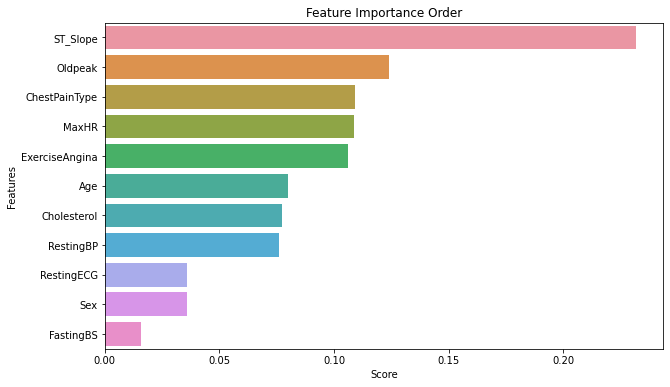

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance Order")
plt.xlabel("Score")
plt.ylabel("Features")

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC

In [ ]:
# MI score
# https://www.kaggle.com/tantable/heartdisease-predict-xgb-vs-svm-87-score
def make_mi_scores(X, y):
    X = X.copy()
    # Exclude continous features
    X = X.select_dtypes(['int'])
    mi_scores = mutual_info_classif(X, y, random_state=1)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

    

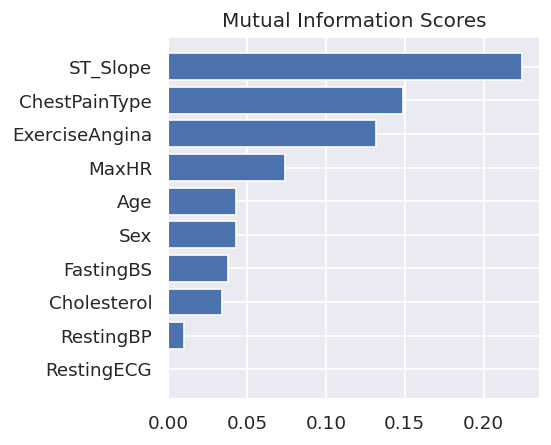

In [ ]:

df = data1
#df = find_and_drop_nans(df)
# df = encode_values(df)

X = df. drop('HeartDisease', axis = 'columns')
y = df['HeartDisease']
mi_scores = make_mi_scores(X, y)

# Show Mutual Information (MI) score plot
plt.figure(dpi=120, figsize=(4, 4))
sns.set(font_scale=1)
plot_mi_scores(mi_scores)


# Data with selected features

In [ ]:
df_sel=df_feat.loc[:, ['ST_Slope', 'ChestPainType', 'ExerciseAngina', 'MaxHR', 'Age', 'Sex']]
df_sel1=df_feat.loc[:, ['ST_Slope', 'ChestPainType', 'Oldpeak', 'ExerciseAngina', 'MaxHR', 'Age', 'Cholesterol', 'RestingBP']]

In [ ]:
X = df_sel
y = data1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
df_sel.head()

,ST_Slope,ChestPainType,ExerciseAngina,MaxHR,Age,Sex
0,0.971639,0.147121,-0.774008,1.291925,-1.335169,0.560898
1,-0.750812,1.190340,-0.774008,0.634669,-0.390639,-1.782855
2,0.971639,0.147121,-0.774008,-1.747885,-1.650013,0.560898
3,-0.750812,-0.896099,1.291976,-1.337100,-0.495587,-1.782855
4,0.971639,1.190340,-0.774008,-0.762001,0.134100,0.560898


In [ ]:
# all the  prediction models together
#KNN
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
pred_KNN=KNN.predict(X_test)
acc_KNN=metrics.accuracy_score(y_test, prediction)

#RF Classifier
RF=RandomForestClassifier(n_estimators=50, random_state=0)
RF.fit(X_train, y_train)
y_pred=RF.predict(X_test)
acc_RF=RF.score(X_test,y_test)

# LR Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
pred_LR = LR.predict(X_test)
acc_LR=accuracy_score(y_test, pred_LR)

#Decision Tree Classifier
DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)
DT.fit(X_train, y_train)
pred_DT = DT.predict(X_test)
acc_DT=accuracy_score(y_test, pred_DT)

# MLP Classifier
MLP = MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.1, random_state=0,
              solver='sgd')
MLP.fit(X_train, y_train)

pred_MLP = MLP.predict(X_test)
acc_MLP = accuracy_score(y_test, pred_MLP)

#Support Vector Classifier
SVM = SVC(C=10, gamma=0.5, kernel='poly', random_state=0, probability=True)
SVM.fit(X_train, y_train)
pred_SVM = SVM.predict(X_test)
acc_SVM = accuracy_score(y_test, pred_SVM)

#Extra Trees Classifier
ET = ExtraTreesClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                     n_estimators=200, random_state=0)
ET.fit(X_train, y_train)
pred_ET = ET.predict(X_test)
acc_ET = accuracy_score(y_test, pred_ET)

#Gradient Boosting Classifier
GB = GradientBoostingClassifier(criterion='mse', loss='exponential',
                           min_samples_leaf=4, min_samples_split=6,
                           n_estimators=25, random_state=0)
GB.fit(X_train, y_train)

pred_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

#Stacking Classifier
estimators = [('DT', DT),
              ('RF', RF),
              ('SVM', SVM),
              ('MLP', MLP),
              ('ET', ET),
              ('LR', LR),
              ('KNN', KNN),
              ('GB', GB),
             ]

SC_tune_LR = StackingClassifier(estimators = estimators, final_estimator = LR)
SC_tune_LR.fit(X_train, y_train)
pred_SC_tune_LR = SC_tune_LR.predict(X_test)
acc_SC_tune_LR = accuracy_score(y_test, pred_SC_tune_LR)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarnin

In [ ]:
# Accuracy of all the models
print("DT: ", acc_DT)
print("RF: ", acc_RF)
print("MLP: ", acc_MLP)
print("ET: ", acc_ET)
print("LR: ", acc_LR)
print("KNN: ", acc_KNN)
print("GB: ", acc_GB)
print("SC: ", acc_SC_tune_LR)

DT:  0.8720379146919431
RF:  0.8388625592417062
MLP:  0.8672985781990521
ET:  0.8815165876777251
LR:  0.8293838862559242
KNN:  0.8436018957345972
GB:  0.8246445497630331
SC:  0.8672985781990521


Here with selected feature columns, Extra Trees Classifier has the best score of 0.8815165876777251

For Data Modelling, what we can do is, we need to first find the driving factors behind a heart disease. The following factors could be the potential factors for it.
1. High Blood pressure
2. High Blood Cholesterol
3. Diabetes
4. Obesity
5. Smoking
6. Gender
7. Heredity

In our case, this is easy since, we are already up with the prediction, as it is already given in the form of binary classification. Whether the person is suffering from heart disease or not.....!!
Since that part is already done, we can proceed to next part where we have to build a model based on the data so that the model can learn from the given factors and can predict on new data.
We can try to use **Neural Networks or Random forest**. (Graph method) Since we have multiple inputs!!! So, multiple nodes, and multiple layers.... and ONE Output, which is whether we the person have/had heart disease or not.

# Data Modeling
Firstly, we will to gain insight into how the classification looks like. We need to know whether whatever model we do, will it fetch something and how we will measure the accuracy of it, wht will be the criteria of it.

In [ ]:
data.head()

In [ ]:
from collections import Counter
columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBs', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
data=pd.read_csv('/content/heart.csv')
# summarising the classification of the heartdisease
target = data['HeartDisease'].values
Counter = Counter(target)
for k,v in Counter.items():
  per = v/len(target)*100
  print('Case=%d, Count=%d, percentage=%.3f%%' % (k,v,per))

The above observation is balanced upto a certain level. But we have got an idea as to what should or could be the accuracy of the model and its prediction. So, the theory is, if the model is able to predict with accuracy more than 55%. We can say that the model is at a high chance of predicting true value.

# Neural Networks time!! The dynamics of it.

In [ ]:
# learning dynamics
X, y = data.values[:, :-1], data.values[:, -1]
#ensure all data are floating point values
try:
  X = np.asarray(X).astype(np.float32)
except ValueError:
        print ("error on line", i)
#encode strings to integer
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

In [ ]:
n_features = X.shape[1]
# defining the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy')

I am facing error in this step... Trying to figure out...

In [ ]:
'''
#fit model
history_data = model.fit(X_train,y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
#predict the model
yhat = model.predict_classes(X_test)
#evaluate predicitions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
'''